# CS109b Final Project: Milestone 1
---
Group 6: Chris Chen, Phillip Huang, Harry Xue, Ted Zhu

In [1]:
# import modules
import requests
import shutil
from IPython.display import Image
from IPython.core.display import HTML 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

## API code to access the genre and movie poster path of your favorite movie
One of my favorite movies is `The Departed`. Let's access the information for it via the TMDB API.

Following the instructions at https://developers.themoviedb.org/3/getting-started, this is pretty straightforward.

### Accessing the genre of The Departed

In [2]:
# API Key (Harry's)
payload = {
            'api_key': '5eef6423b6f7cea2f5b6cae0838e38f9',
            'query': 'The Departed' 
         }

r = requests.get('https://api.themoviedb.org/3/search/movie', params = payload).json()
r

{u'page': 1,
 u'results': [{u'adult': False,
   u'backdrop_path': u'/8Od5zV7Q7zNOX0y9tyNgpTmoiGA.jpg',
   u'genre_ids': [18, 53, 80],
   u'id': 1422,
   u'original_language': u'en',
   u'original_title': u'The Departed',
   u'overview': u"To take down South Boston's Irish Mafia, the police send in one of their own to infiltrate the underworld, not realizing the syndicate has done likewise. While an undercover cop curries favor with the mob kingpin, a career criminal rises through the police ranks. But both sides soon discover there's a mole among them.",
   u'popularity': 4.587519,
   u'poster_path': u'/tGLO9zw5ZtCeyyEWgbYGgsFxC6i.jpg',
   u'release_date': u'2006-10-05',
   u'title': u'The Departed',
   u'video': False,
   u'vote_average': 7.8,
   u'vote_count': 3344},
  {u'adult': False,
   u'backdrop_path': None,
   u'genre_ids': [27, 18],
   u'id': 321724,
   u'original_language': u'ko',
   u'original_title': u'\u5996\u82b1\uc758 \u50b3\u8aaa',
   u'overview': u"A devoted son hears 

The first result is the one we want, so let's extract the movie's id in order to look up the genre of the film.

In [3]:
the_departed_id = r['results'][0]['id']
# Sanity check to see if we got the right one
the_departed_id

1422

In [4]:
# Now let's access the film's information by id in order to lookup the genre
r = requests.get('https://api.themoviedb.org/3/movie/' + str(the_departed_id) + '?api_key=5eef6423b6f7cea2f5b6cae0838e38f9').json()
genres_list = r['genres']

# Unpack the names of the genres
for genre in genres_list:
    print genre['name']

Drama
Thriller
Crime


### Accessing the poster for The Departed

In [5]:
poster_path = r['poster_path']
url = 'http://image.tmdb.org/t/p/w500/' + poster_path
Image(url=url)

## Genre for this movie listed by TMDb and IMDb

Let's compare the genres fetched from TMDb with those from IMDb.
http://www.imdb.com/title/tt0407887/

IMDb lists the genres:
Crime, Drama, Thriller

We have a match!

## A list of the 10 most popular movies of 2016 from TMDb and their genre obtained via the API

In [6]:
popular_r = requests.get('https://api.themoviedb.org/3/discover/movie?' + 'api_key=5eef6423b6f7cea2f5b6cae0838e38f9' + '&primary_release_year=2016').json()

# Print names of most popular movies
print "Names of most popular films in 2016:"
titles = []
# Get list of ids for genre lookup
ids = []
for i, film in enumerate(popular_r['results'][:10]):
    titles.append(film['original_title'])
    ids.append(film['id'])
    print i+1, film['original_title']

print "\n"

# Create dictionary of {title: genre list} entries
# i.e. {'The Departed': ['Crime','Drama',...]...} 
genres_by_movie = {title: [] for title in titles}

# Look up genres for each of the films
for i, id in enumerate(ids):
    print "Genres for", titles[i], ':' 
    
    # Now let's access the film's information by id in order to lookup the genre
    r = requests.get('https://api.themoviedb.org/3/movie/' + str(id) + '?api_key=5eef6423b6f7cea2f5b6cae0838e38f9').json()
    genres_list = r['genres']

    # Unpack the names of the genres
    for genre in genres_list:
        # Eliminate spaces between words in genre name
        genres_by_movie[titles[i]].append(genre['name'].replace(" ", "")) 
        print genre['name']
    
    print "\n"

Names of most popular films in 2016:
1 Sing
2 Fantastic Beasts and Where to Find Them
3 Finding Dory
4 Deadpool
5 Rogue One: A Star Wars Story
6 Doctor Strange
7 Arrival
8 Captain America: Civil War
9 Underworld: Blood Wars
10 Lion


Genres for Sing :
Animation
Comedy
Drama
Family
Music


Genres for Fantastic Beasts and Where to Find Them :
Adventure
Action
Fantasy


Genres for Finding Dory :
Adventure
Animation
Comedy
Family


Genres for Deadpool :
Action
Adventure
Comedy
Romance


Genres for Rogue One: A Star Wars Story :
Action
Drama
Science Fiction
War


Genres for Doctor Strange :
Action
Adventure
Fantasy
Science Fiction


Genres for Arrival :
Drama
Science Fiction


Genres for Captain America: Civil War :
Action
Science Fiction


Genres for Underworld: Blood Wars :
Action
Horror


Genres for Lion :
Drama




## Visualization of Movie Genre Pairs
We can create a cooccurence matrix of genres across the top 10 movies from 2016, and then visualize via heatmap.

Inspiration from: http://stackoverflow.com/questions/35562789/word-word-co-occurrence-matrix

In [7]:
# Get genre lists into right format for CountVectorizer
docs = [" ".join(genre_list) for genre_list in genres_by_movie.values()]

count_model = CountVectorizer(ngram_range=(1,1)) # default unigram model
X = count_model.fit_transform(docs)
Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
print(Xc.todense()) # print out matrix in dense format

[[0 3 0 1 1 0 2 1 0 1 3 1]
 [3 0 1 2 0 1 2 0 0 1 1 0]
 [0 1 0 2 1 2 0 0 1 0 0 0]
 [1 2 2 0 1 2 0 0 1 1 0 0]
 [1 0 1 1 0 1 0 0 1 0 2 1]
 [0 1 2 2 1 0 0 0 1 0 0 0]
 [2 2 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 0]
 [3 1 0 0 2 0 1 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 0 1 0]]


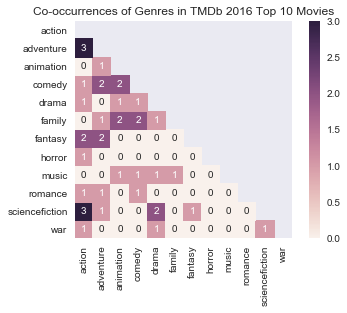

In [8]:
df = pd.DataFrame(Xc.todense(), index=count_model.get_feature_names(), columns=count_model.get_feature_names())

ax = plt.axes()

# Apply mask to only plot half of matrix
mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(df, mask=mask, annot=True, fmt="d", square=True)

ax.set_title('Co-occurrences of Genres in TMDb 2016 Top 10 Movies')

This looks a bit sparse, let's expand it to the rest of the pulled data, which totals 20 in length.

[[0 6 0 1 1 0 5 0 1 0 1 5 1]
 [6 0 2 3 2 2 6 0 0 0 2 4 0]
 [0 2 0 3 1 3 0 0 0 1 0 0 0]
 [1 3 3 0 1 3 0 0 0 1 1 0 0]
 [1 2 1 1 0 1 1 2 0 1 1 3 2]
 [0 2 3 3 1 0 0 0 0 1 0 0 0]
 [5 6 0 0 1 0 0 0 0 0 0 3 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 0 0 0]
 [1 2 0 1 1 0 0 0 0 0 0 1 0]
 [5 4 0 0 3 0 3 0 0 0 1 0 1]
 [1 0 0 0 2 0 0 1 0 0 0 1 0]]


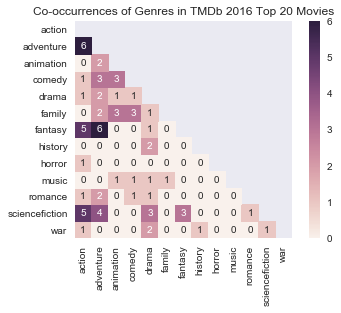

In [9]:
#
# Repeat above steps with the entire set
#

titles_full = []
ids_full = []
for film in popular_r['results']:
    titles_full.append(film['original_title'])
    ids_full.append(film['id'])

# Create dictionary of {title: genre list} entries
# i.e. {'The Departed': ['Crime','Drama',...]...} 
genres_by_movie_full = {title: [] for title in titles_full}

# Look up genres for each of the films
for i, id in enumerate(ids_full):
    
    # Now let's access the film's information by id in order to lookup the genre
    r = requests.get('https://api.themoviedb.org/3/movie/' + str(id) + '?api_key=5eef6423b6f7cea2f5b6cae0838e38f9').json()
    genres_list = r['genres']

    # Unpack the names of the genres
    for genre in genres_list:
        # Eliminate spaces between words in genre name
        genres_by_movie_full[titles_full[i]].append(genre['name'].replace(" ", "")) 
        
# Get genre lists into right format for CountVectorizer
docs = [" ".join(genre_list) for genre_list in genres_by_movie_full.values()]

count_model = CountVectorizer(ngram_range=(1,1)) # default unigram model
X = count_model.fit_transform(docs)
Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
print(Xc.todense()) # print out matrix in dense format

df = pd.DataFrame(Xc.todense(), index=count_model.get_feature_names(), columns=count_model.get_feature_names())

ax = plt.axes()

# Apply mask to only plot half of matrix
mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(df, mask=mask, annot=True, fmt="d", square=True)

ax.set_title('Co-occurrences of Genres in TMDb 2016 Top 20 Movies')

This appears more comprehensive. We see that Action, Adventure, and Fantasy seem to group together. Action and Science Fiction are also often paired.

## Additional visualization sketches and EDA with a focus on movie genres

In [10]:
# load IMDB 5000 data
df = pd.read_csv("data/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [11]:
# encode genre as list and grab genres
genres = set()
genre_list = []
for i in xrange(len(df["genres"])):
    movie_genres = df["genres"].ix[i,].split("|")
    genre_list.append(movie_genres)
    for genre in movie_genres:
        genres.add(genre)
df["genres"] = genre_list
genres = sorted(list(genres))

# check correctness
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,[Documentary],...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [12]:
list(df.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [13]:
genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

## Looking at Countries

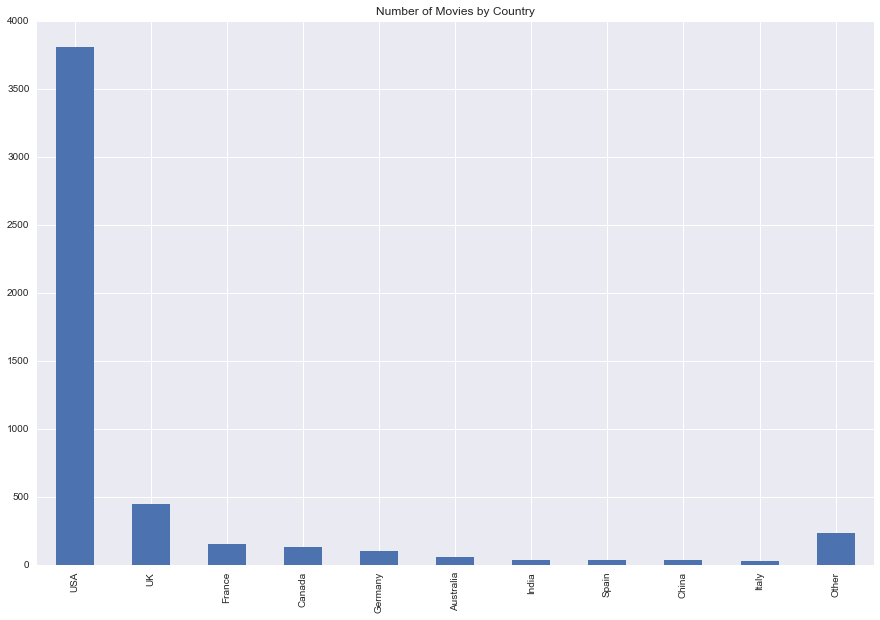

In [14]:
# grab country names
countries = df["country"].unique()
# remove NaN
countries = np.delete(countries, 2)

country_count = df.groupby('country').count()["movie_title"].sort_values(ascending=False)
country_count_top = country_count[0:10]
country_count_top = country_count_top.append(pd.Series(country_count.sum() - country_count_top.sum(), index=["Other"]))
country_count_top.plot(kind='bar',
                      title = "Number of Movies by Country",
                      figsize=(15,10))




### Movie count by country

Here we see that the vast majority of films come from the USA. 

In [15]:
df_genre_country = pd.DataFrame()
top = list(country_count[0:11].index)
for country in top:
    country_movies = df[df["country"] == country]
    genre_count = [0] * len(genres)
    for _, movie in country_movies.iterrows():
        genre_for_movie = movie["genres"]
        for genre in genre_for_movie:
            genre_count[genres.index(genre)] += 1
    df_genre_country[country] = genre_count
    
df_genre_country["Genre"] = genres
df_genre_country.set_index("Genre", inplace = True)
df_genre_country

,USA,UK,France,Canada,Germany,Australia,India,Spain,China,Italy,Japan
Genre,,,,,,,,,,,
Action,861,91,31,26,26,16,7,2,18,2,12
Adventure,685,98,20,13,16,16,3,5,12,2,14
Animation,182,12,12,3,4,2,1,2,2,0,10
Biography,179,57,13,6,9,5,3,2,1,1,0
Comedy,1529,128,41,41,32,16,14,4,6,6,4
Crime,672,77,39,18,29,4,1,4,2,7,1
Documentary,90,11,4,2,2,1,2,0,0,0,0
Drama,1852,265,98,65,54,28,23,24,18,15,8
Family,436,38,12,11,12,8,1,2,2,0,7


In [16]:
def proportionize(series):
    answer = []
    for item in series:
        answer.append(float(item) / float(series.sum()))
    return pd.Series(answer)

df_genre_country_prop = df_genre_country.apply(proportionize)
df_genre_country_prop["Genre"] = genres

In [17]:
df_genre_country_prop = pd.melt(df_genre_country_prop, id_vars=['Genre'], value_vars=top)
df_genre_country_prop.to_csv("data/genre_country_prop.csv")
df_genre_country_prop.head()

,Genre,variable,value
0,Action,USA,0.079027
1,Adventure,USA,0.062873
2,Animation,USA,0.016705
3,Biography,USA,0.016430
4,Comedy,USA,0.140340


![StackedBar](images/stacked_bar_proportion.png)

### Genre Proportion of Movies, Top 10 Countries
Here, we see the proportion that each genre takes up in the movies produced by the top 10 countries. Several interesting patterns emerge. The top six countries---USA, UK, France, Canada, Germany, and Australia---have about the same proportions of genres. Countries seven through ten begin to diverge slightly. India appears to have a higher proportion Romance and Comedy movies, Spain focuses on Mystery, China likes Action, Adventure, and History films, and Italians enjoy movies about Crime. Japan is the most different of them all, with a lower proportion of Drama, but relatively higher Animation, Fantasy, Family, Adventure, and Sci-Fi. Here, we get a glimpse at the taste of movie genres by country.

Note: This was computed in Tableau.

## Genre and Quality

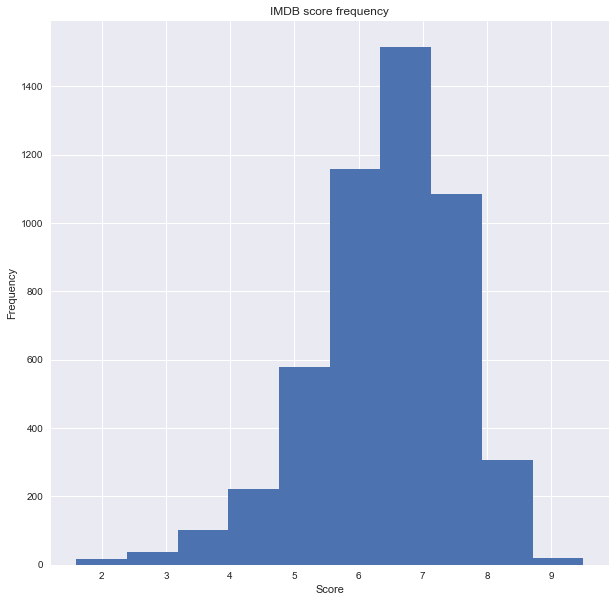

In [18]:
df["imdb_score"].hist(figsize=(10,10))
plt.title('IMDB score frequency')
plt.xlabel('Score')
plt.ylabel('Frequency')

### Distribution of IMDB Scores
Here, we see that the distribution of IMDB scores are left skewed, with a central point around 7.

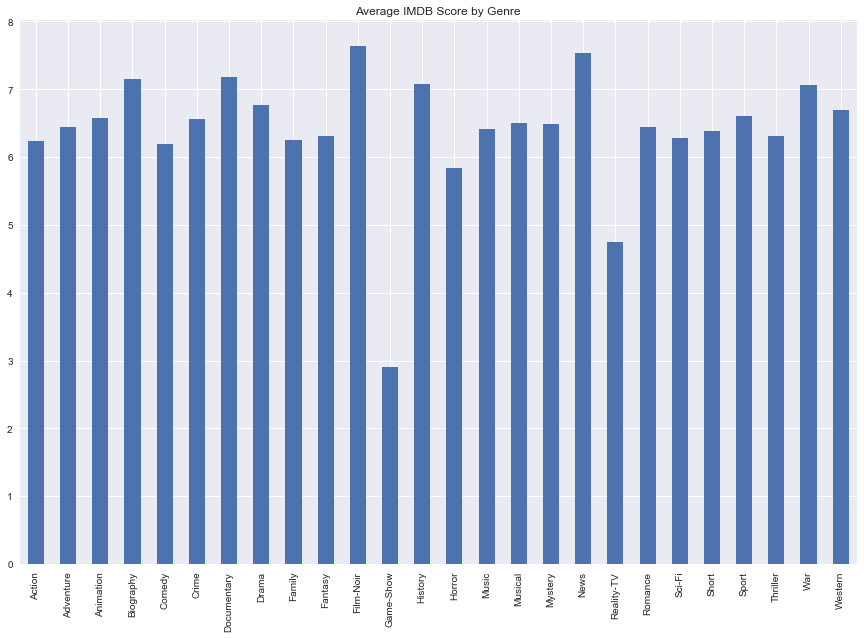

In [19]:
genre_count = [0] * len(genres)
imdb_score_sum = [0] * len(genres)

for _,movie in df.iterrows():
    genre_for_movie = movie["genres"]
    for genre in genre_for_movie:
        genre_count[genres.index(genre)] += 1
        imdb_score_sum[genres.index(genre)] += movie["imdb_score"]
        
avg_imdb_score = [float(sum) / float(count) for (count, sum) in zip(genre_count, imdb_score_sum)]
pd.Series(avg_imdb_score, index=genres).plot(kind='bar',
                                             title = "Average IMDB Score by Genre",
                                             figsize=(15,10))

### Average IMDB Score by Genre
Here, we see that IMDB likes Film-Noir, News, Documentaries, and Biographies the most, while it typically dislikes Game-Shows and Reality-TV Shows. 

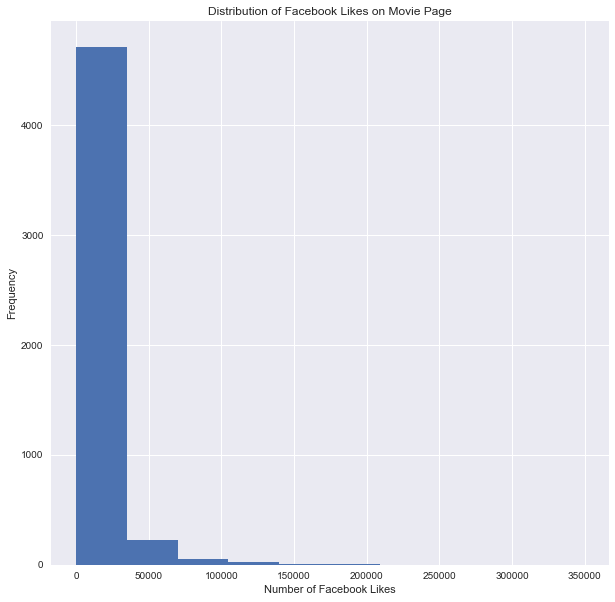

In [20]:
df["movie_facebook_likes"].hist(figsize=(10,10))
plt.title('Distribution of Facebook Likes on Movie Page')
plt.xlabel('Number of Facebook Likes')
plt.ylabel('Frequency')

### Distribution of Facebook Likes on Movie Pages
Here, we see that the distribution is highly right skewed; there are a small handful of super-popular movies, while the rest are moderately liked.

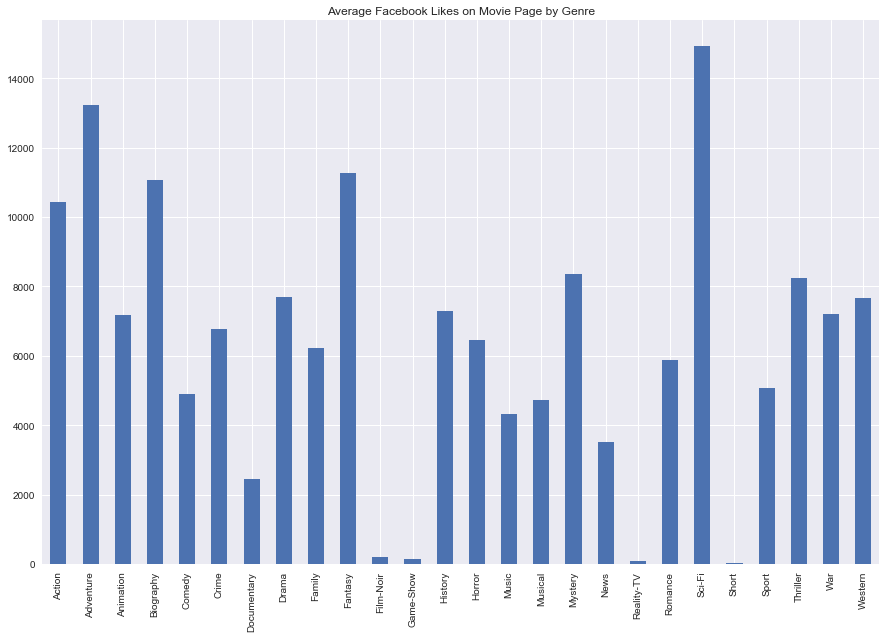

In [21]:
facebook_like_sum = [0] * len(genres)

for _,movie in df.iterrows():
    genre_for_movie = movie["genres"]
    for genre in genre_for_movie:
        imdb_score_sum[genres.index(genre)] += movie["movie_facebook_likes"]
        
avg_facebook_like = [float(sum) / float(count) for (count, sum) in zip(genre_count, imdb_score_sum)]
pd.Series(avg_facebook_like, index=genres).plot(kind='bar',
                                             title = "Average Facebook Likes on Movie Page by Genre",
                                             figsize=(15,10))

### Facebook Likes on Movie Page by Genre
Here, we see that Facebook users like Sci-Fi and Adventure movies the most, while there are almost no likes for Short films, Reality-TV, Game Shows, and Film-Noir.  

It appears that the tastes of the masses differ from the tastes of critics on IMDB, although they seem to both dislike Game-Shows.

## Looking at Directors

In [22]:
#call: function with a directors name, e.g. "plot_director("James Cameron)"
#return: a plot with the number of films they've made that qualify as a certain genre
def plot_director(name):
    curr_df = df[df["director_name"] == name]
    genres = curr_df["genres"]
    genres_new = [item for sublist in list(genres) for item in sublist]
    dictionary = plt.figure(figsize=(12, 8))
    d = Counter(genres_new)
    plt.bar(range(len(d)), d.values(), align = "center")
    plt.xticks(range(len(d)), d.keys())
    plt.tick_params(axis="x", width = 20.0)
    plt.xlabel("Genres")
    plt.ylabel("Counts")
    plt.title("Genre mentions of movies made by director " + name)
    plt.show()

In [23]:
#return the top 10 directors that show up the most in this dataset
import operator
sorted(Counter(df["director_name"]).items(), key = operator.itemgetter(1))[::-1][1:11]

[('Steven Spielberg', 26),
 ('Woody Allen', 22),
 ('Clint Eastwood', 20),
 ('Martin Scorsese', 20),
 ('Ridley Scott', 17),
 ('Steven Soderbergh', 16),
 ('Spike Lee', 16),
 ('Tim Burton', 16),
 ('Renny Harlin', 15),
 ('Oliver Stone', 14)]

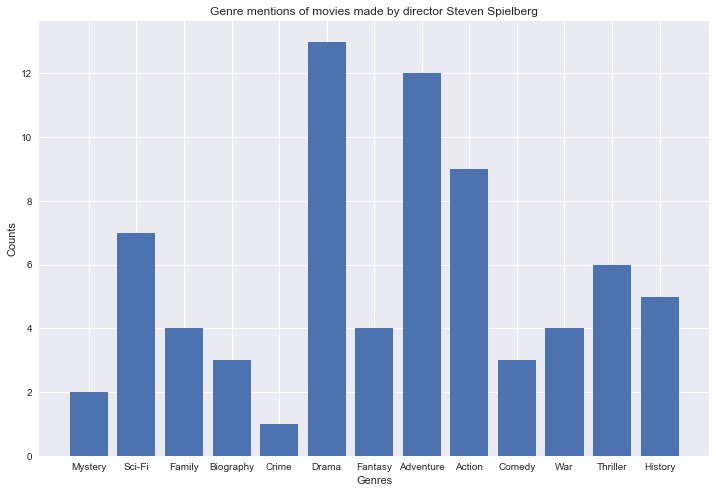

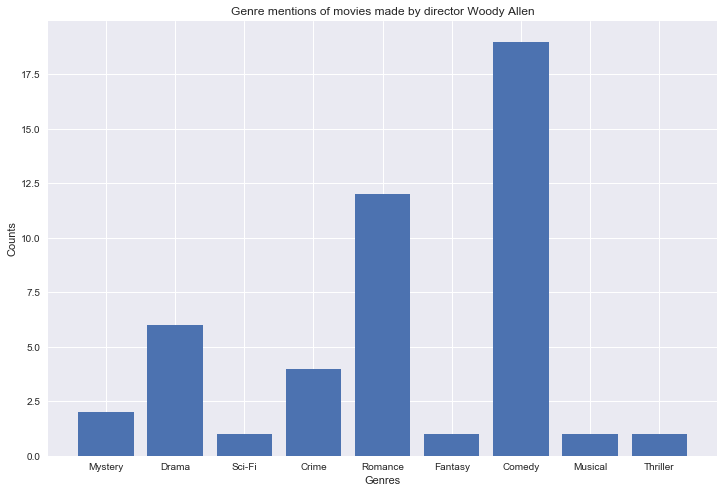

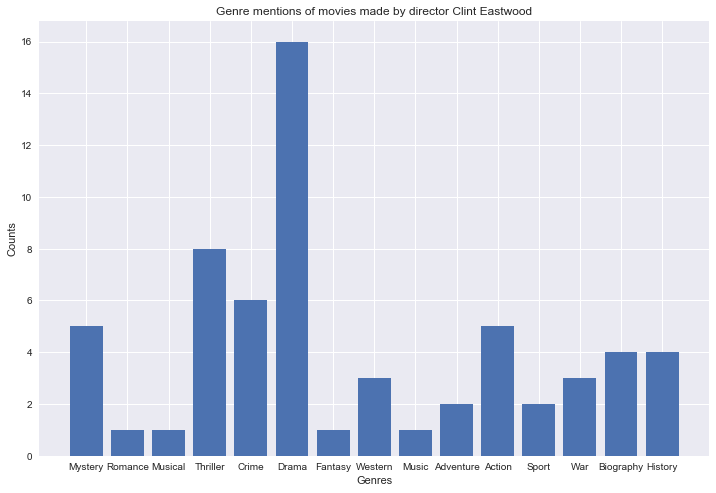

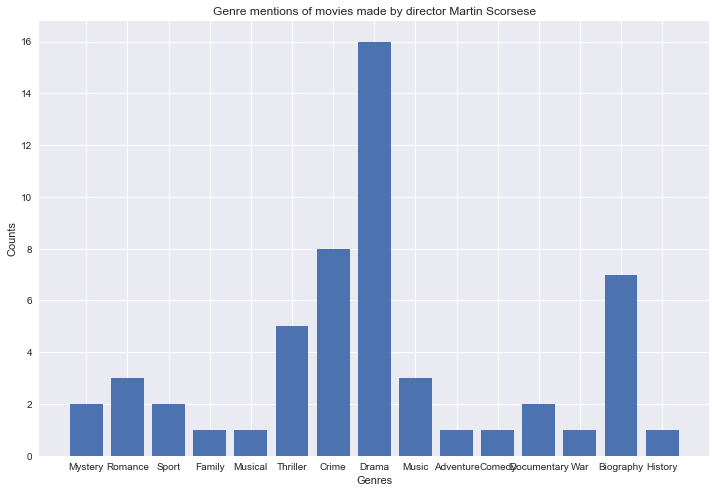

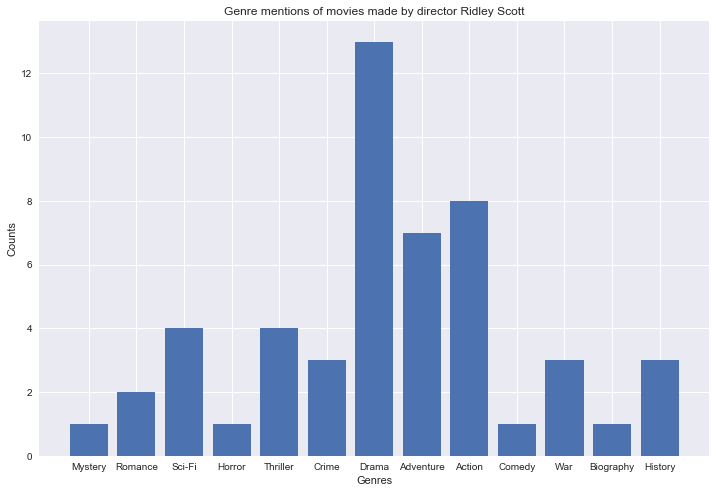

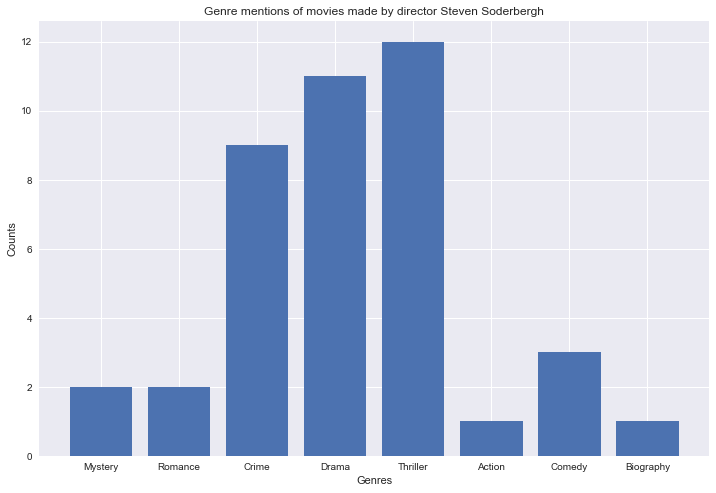

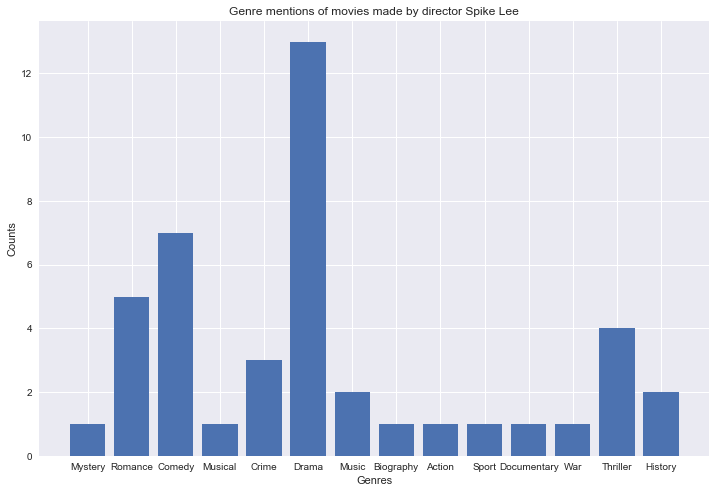

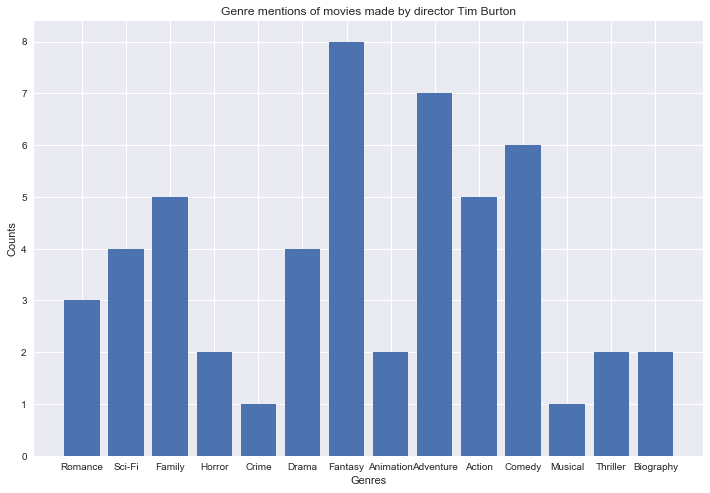

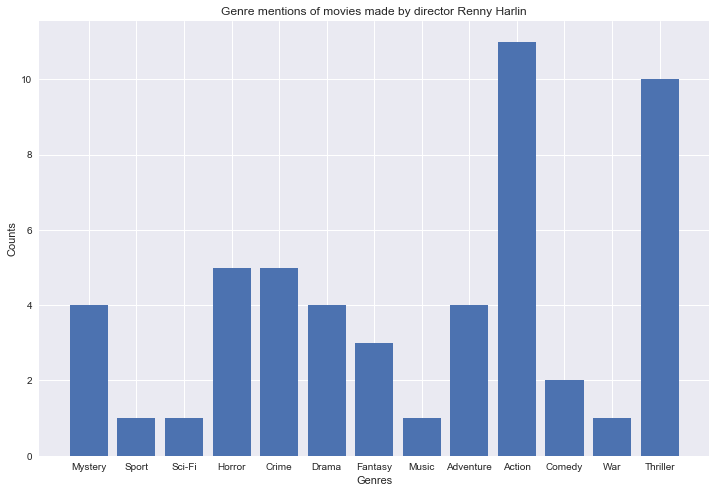

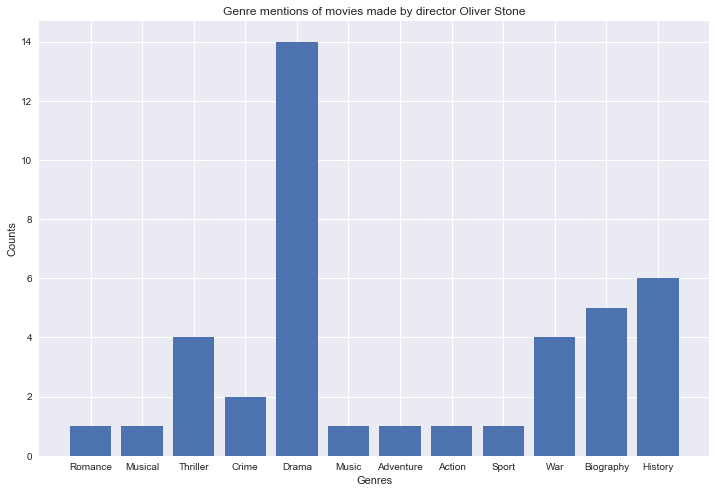

In [24]:
top = ["Steven Spielberg", "Woody Allen", "Clint Eastwood", "Martin Scorsese", "Ridley Scott", "Steven Soderbergh", "Spike Lee", "Tim Burton", "Renny Harlin", "Oliver Stone"]
for d in top:
    plot_director(d)

## Conclusions:
We see here that there are very obviously some genres that specific directors have frequently dabbled in. For example, Woody Allen most frequently directs movies that fall under comedy and/or romance genres, while Clint Eastwood has directed numerous more movies in that are dramas than any other category. Renny Harlin, meanwhile, directs many action and thriller movies. 

It may be easy to look at that, but we also must contextualize this information using the knowledge we know about the genres overall. If most directors happen to direct a certain specific genre, then it might look like a calling card to help us identify the genre if we find out the director. But what if it turns out that the entire industry just so happens to really like directing that genre? Then the information's value is likely not as important.

In [25]:
# curr_df = df[df["director_name"] == name]
genres = df["genres"]
genres_new = [item for sublist in list(genres) for item in sublist]
sorted(Counter(genres_new).items(), key = operator.itemgetter(1))[::-1]

[('Drama', 2594),
 ('Comedy', 1872),
 ('Thriller', 1411),
 ('Action', 1153),
 ('Romance', 1107),
 ('Adventure', 923),
 ('Crime', 889),
 ('Sci-Fi', 616),
 ('Fantasy', 610),
 ('Horror', 565),
 ('Family', 546),
 ('Mystery', 500),
 ('Biography', 293),
 ('Animation', 242),
 ('Music', 214),
 ('War', 213),
 ('History', 207),
 ('Sport', 182),
 ('Musical', 132),
 ('Documentary', 121),
 ('Western', 97),
 ('Film-Noir', 6),
 ('Short', 5),
 ('News', 3),
 ('Reality-TV', 2),
 ('Game-Show', 1)]

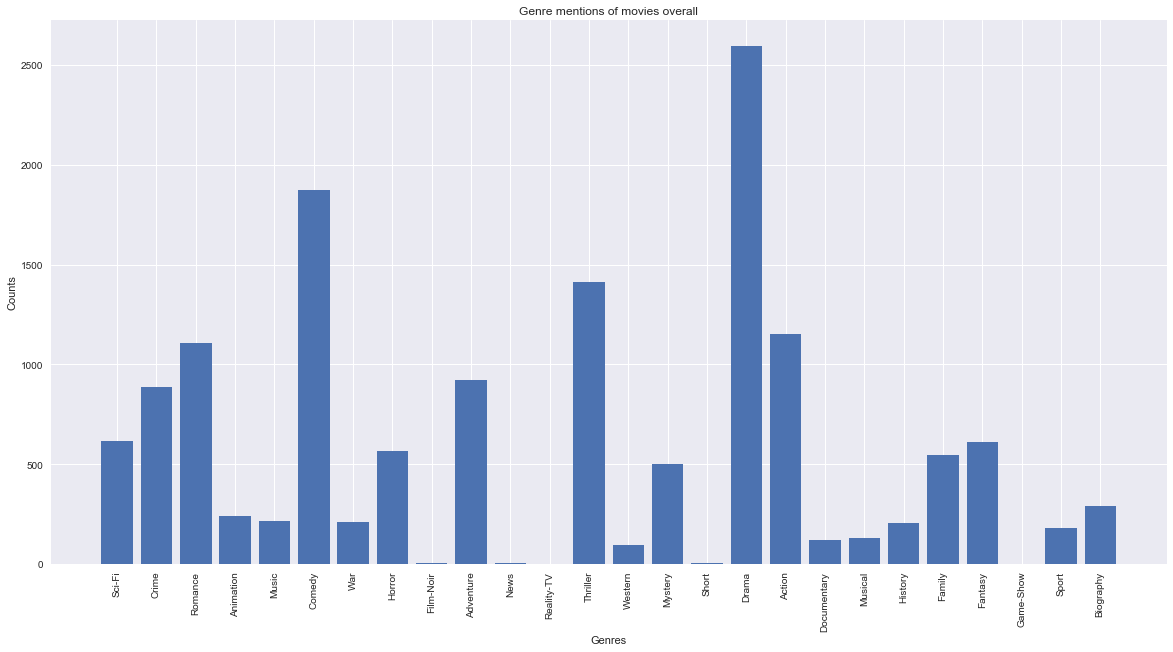

In [26]:
dictionary = plt.figure(figsize=(20, 10))
# d = sorted(Counter(genres_new).items(), key = operator.itemgetter(1))[::-1]
d = Counter(genres_new)
plt.bar(range(len(d)), d.values(), align = "center")
plt.xticks(range(len(d)), d.keys(), rotation='vertical')
plt.tick_params(axis="x", width = 20.0)
plt.xlabel("Genres")
plt.ylabel("Counts")
plt.title("Genre mentions of movies overall")
plt.show()
#d

As we discussed above, this is somewhat true in that the most common films are dramas, while comedy comes in second. However, when dramas/comedies are clearly the most common type of film a director has worked on, it can still be very useful information. Additionally, if a director directs a lot of movies in other categories, then those can also be potentially useful factors for us to consider.

## A list of questions you could answer with this and related data

* Question
* Question